In [52]:
import pandas as pd 
import numpy as np
import plotly.express as px
import xgboost as xgb
from sklearn.model_selection import train_test_split    
from sklearn import metrics
from sklearn.svm import SVR

In [53]:
df = pd.read_csv('../data_samples/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [55]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21611.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.396095,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.128162,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [56]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

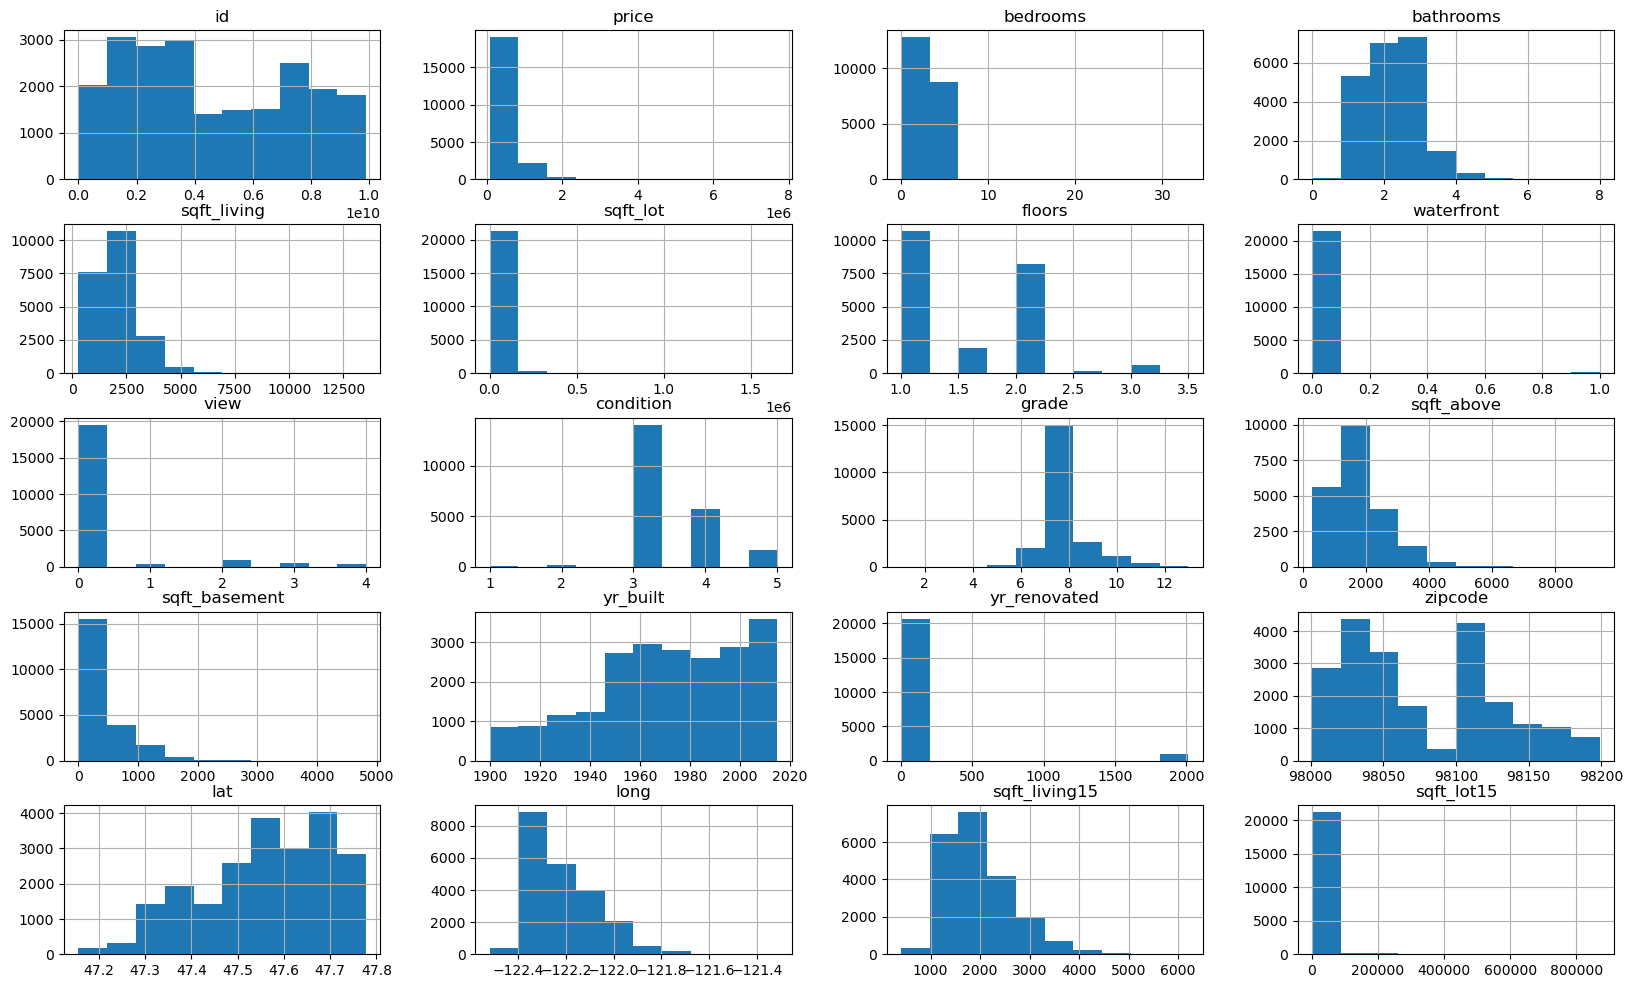

In [57]:
df.hist(figsize=(20,12));

In [58]:
X = df.iloc[: , 3:].values
y= df['price'].values


In [59]:
X_train , X_test , y_train , y_test = train_test_split(X ,y)

In [60]:
xgb_rgr = xgb.XGBRegressor(colsample_bytree = .8 , learning_rate = .1 , max_depth = 6 , n_estimators = 100 , verbosity = 3)
xgb_rgr.fit(X_train, y_train)  
y_pred = xgb_rgr.predict(X_test)

print(f'mean abs err : {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'R2 Score : {metrics.r2_score(y_test, y_pred)}')
print(f'mean sqrt err : {metrics.mean_squared_error(y_test, y_pred)}')

[16:33:21] ======== Monitor (0): HostSketchContainer ========
[16:33:21] AllReduce: 0.001486s, 1 calls @ 1486us

[16:33:21] MakeCuts: 0.001542s, 1 calls @ 1542us

[16:33:21] DEBUG: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\gbm\gbtree.cc:130: Using tree method: 0
[16:33:21] ======== Monitor (0): Learner ========
[16:33:21] Configure: 0.000348s, 1 calls @ 348us

[16:33:21] EvalOneIter: 0.000434s, 100 calls @ 434us

[16:33:21] GetGradient: 0.002413s, 100 calls @ 2413us

[16:33:21] PredictRaw: 8.4e-05s, 100 calls @ 84us

[16:33:21] UpdateOneIter: 0.140302s, 100 calls @ 140302us

[16:33:21] ======== Monitor (0): GBTree ========
[16:33:21] BoostNewTrees: 0.136879s, 100 calls @ 136879us

[16:33:21] CommitModel: 4.5e-05s, 100 calls @ 45us

[16:33:21] ======== Monitor (0): HistUpdater ========
[16:33:21] BuildHistogram: 0.037596s, 500 calls @ 37596us

[16:33:21] EvaluateSplits: 0.041395s, 600 calls @ 41395us

[16:33:21

In [61]:
df['price'].mean()

540088.1417665294

In [62]:
df['price'].std()

367127.1964826997

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

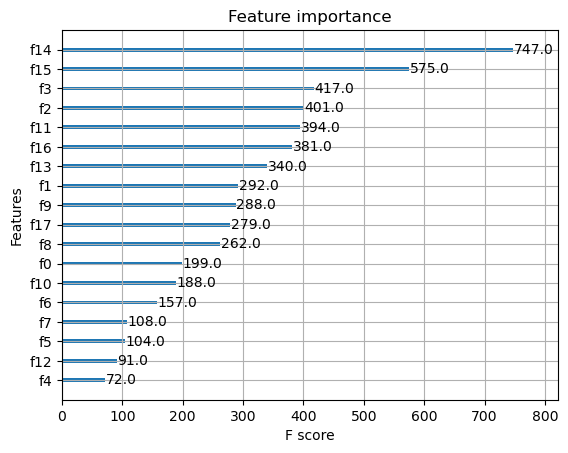

In [63]:
xgb.plot_importance(xgb_rgr)

In [64]:
df.columns[3:]

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [65]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [66]:
rows_with_nan = df[df.isnull().any(axis=1)]
df.update(rows_with_nan.fillna(0))
f_cleaned = df.dropna()
f_cleaned.isnull().sum()
X = f_cleaned.iloc[: , 3:].values
y= f_cleaned['price'].values
X_train , X_test , y_train , y_test = train_test_split(X ,y)


In [67]:

s_rgr = SVR()
s_rgr.fit(X_train, y_train)
y_pred = s_rgr.predict(X_test)
print(f'mean abs err : {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'R2 Score : {metrics.r2_score(y_test, y_pred)}')
print(f'mean sqrt err : {metrics.mean_squared_error(y_test, y_pred)}')


mean abs err : 222618.75224541046
R2 Score : -0.05842206423417218
mean sqrt err : 151278560721.3445
